# Import Libraries

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

import time
from datetime import datetime, timedelta, timezone
import pytz

import matplotlib.pyplot as plt
import seaborn as sns

# Scraping Data from Jobstreet

In [27]:
def scraping_data(key, num_pages):
    base_url = 'https://www.jobstreet.co.id'
    # list untuk menyimpan data
    data = []

    # Looping untuk setiap halaman
    for page in range(1, num_pages + 1):

        url = f'{base_url}/id/{key}?page={page}'

        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        #a_tags = soup.find_all('a', attrs={'data-automation': 'job-list-view-job-link'})
        a_tags= soup.select('a[data-automation="job-list-view-job-link"]') #menggunakan CSS selector
        href_list = [a.get('href') for a in a_tags]

        for href_value in href_list:
            full_url = base_url + href_value
            job_response = requests.get(full_url)

            job_soup = BeautifulSoup(job_response.text, 'html.parser')

            job_title = job_soup.find('h1').text.strip()
            company_name = job_soup.find('span', class_='lnocuod', attrs={'data-automation': 'advertiser-name'}).text.strip()
            job_description = job_soup.find('div', {'data-automation': 'jobAdDetails'}).get_text(strip=True)
            job_type = job_soup.find_all('span', class_='_1wkzzau0 a1msqi4y a1msqir')[2].text.strip()

            data.append({'Job Title': job_title, 'Company': company_name,
                         'Job Description': job_description, 'Job Type': job_type})

    df = pd.DataFrame(data)
    return df

df = scraping_data('data-science-jobs', num_pages=5)
df

,Job Title,Company,Job Description,Job Type
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual
2,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu
3,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu
...,...,...,...,...
155,Lead Data Engineer - Data Product,PT Mid Solusi Nusantara (MEKARI),Mekari is Indonesia's no. 1 Software-as-a-Serv...,Penuh waktu
156,Data Scientist Tech Lead,Asuransi Astra,Menganalisis data penjualan mobil bekas dan pe...,Penuh waktu
157,Junior Data Analyst - Tribun Network,Kompas Gramedia - KG Media,Job description & requirementsJob Description:...,Penuh waktu
158,ML Engineer,Asuransi Astra,"Merancang, mengembangkan, dan mengimplementasi...",Penuh waktu


In [28]:
def check_skills(description, skills):
    description_lower = description.lower()
    found_skills = []

    for skill in skills:
        pattern = r'\b{}\b'.format(re.escape(skill.lower()))
        if re.search(pattern, description_lower):
            found_skills.append(skill)

    return found_skills if found_skills else ['Unknown']

def add_columns(df, skills, column_name):
    df[column_name] = df['Job Description'].apply(lambda x: check_skills(x, skills))
    return df

# Keterampilan yang ingin diperiksa
list_skills = ['SQL','Python','R','Javascript', 'C#','C++',
               'MySQL','Postgres','Azure','Database','AWS','Google Cloud Platform','GCP','Machine Learning',
               'OpenCV','tensorflow','Deep learning','scikit-learn','pandas',
               'CI/CD','MLOps','WandB','Neptune','Kubernetes','docker',
               'NoSQL','MongoDB','Hadoop','spark','Hive','MapReduce','kafka','Git','Airflow','talend',
               'Excel']


df_jobs = add_columns(df, list_skills, column_name='Skills')
df_jobs


,Job Title,Company,Job Description,Job Type,Skills
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu,"[SQL, Python, Azure]"
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual,"[SQL, R, Excel]"
2,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu,"[SQL, Python, R, Excel]"
3,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak,[Unknown]
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu,"[R, MySQL, Machine Learning, Hadoop, spark, Hi..."
...,...,...,...,...,...
155,Lead Data Engineer - Data Product,PT Mid Solusi Nusantara (MEKARI),Mekari is Indonesia's no. 1 Software-as-a-Serv...,Penuh waktu,"[SQL, Python, AWS, GCP, spark, kafka, Git, Air..."
156,Data Scientist Tech Lead,Asuransi Astra,Menganalisis data penjualan mobil bekas dan pe...,Penuh waktu,"[SQL, Python, R, Machine Learning, NoSQL, Hado..."
157,Junior Data Analyst - Tribun Network,Kompas Gramedia - KG Media,Job description & requirementsJob Description:...,Penuh waktu,"[SQL, MySQL, AWS]"
158,ML Engineer,Asuransi Astra,"Merancang, mengembangkan, dan mengimplementasi...",Penuh waktu,"[Python, Machine Learning, tensorflow, Deep le..."


In [29]:
list_viz_tools = ['tableau', 'power bi','QlikView','looker', 'kibana',
                  'matplotlib', 'seaborn', 'plotly', 'bokeh']
df = add_columns(df, list_viz_tools,column_name='Visualization Tools')
df

,Job Title,Company,Job Description,Job Type,Skills,Visualization Tools
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu,"[SQL, Python, Azure]",[Unknown]
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual,"[SQL, R, Excel]",[Unknown]
2,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu,"[SQL, Python, R, Excel]",[power bi]
3,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak,[Unknown],[Unknown]
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu,"[R, MySQL, Machine Learning, Hadoop, spark, Hi...",[Unknown]
...,...,...,...,...,...,...
155,Lead Data Engineer - Data Product,PT Mid Solusi Nusantara (MEKARI),Mekari is Indonesia's no. 1 Software-as-a-Serv...,Penuh waktu,"[SQL, Python, AWS, GCP, spark, kafka, Git, Air...",[Unknown]
156,Data Scientist Tech Lead,Asuransi Astra,Menganalisis data penjualan mobil bekas dan pe...,Penuh waktu,"[SQL, Python, R, Machine Learning, NoSQL, Hado...",[Unknown]
157,Junior Data Analyst - Tribun Network,Kompas Gramedia - KG Media,Job description & requirementsJob Description:...,Penuh waktu,"[SQL, MySQL, AWS]","[tableau, looker]"
158,ML Engineer,Asuransi Astra,"Merancang, mengembangkan, dan mengimplementasi...",Penuh waktu,"[Python, Machine Learning, tensorflow, Deep le...",[Unknown]


In [ ]:
df.loc[158,'Skills']

['SQL', 'Python', 'R', 'AWS', 'Machine Learning']

In [34]:
target_skill = 'Python'

# Menghitung jumlah kemunculan 'Python' dalam kolom 'Skills'
python_count = df['Skills'].apply(lambda x: x.count(target_skill)).sum()

print(f"Jumlah kemunculan 'Python' dalam kolom 'Skills': {python_count}")

Jumlah kemunculan 'Python' dalam kolom 'Skills': 55


In [35]:
# Mendapatkan offset waktu lokal
local_offset = -time.timezone if (time.localtime().tm_isdst == 0) else -time.altzone
local_timezone = timezone(timedelta(seconds=local_offset))

# Mencetak informasi zona waktu
print(f"Local Timezone: {time.tzname[0]}")
print(f"Local Offset: {local_offset / 3600:.2f} hours")

# Mencetak waktu sekarang
current_time = datetime.now(local_timezone)
print(f"Current Time: {current_time} ({current_time.tzinfo})")

Local Timezone: UTC
Local Offset: 0.00 hours
Current Time: 2023-12-12 23:49:59.127146+00:00 (UTC)


In [36]:
# Menentukan zona waktu Indonesia
indonesia_timezone = pytz.timezone('Asia/Jakarta')
current_time = datetime.now(indonesia_timezone).strftime('%Y-%m-%d_%H-%M-%S')

In [37]:
file_name = f"job-{current_time}.csv"
df.to_csv(file_name, index=False)

# EDA (Exploratory Data Analysis)

In [66]:
# Menggabungkan semua keterampilan menjadi satu daftar
all_skills = [skill for sublist in df['Skills'] for skill in sublist]

# Menghitung frekuensi setiap keterampilan
skill_counts = pd.Series(all_skills).value_counts()

print(all_skills[:6])
print(skill_counts.head())

['SQL', 'Python', 'Azure', 'SQL', 'R', 'Excel']
SQL         65
Python      55
Database    50
Excel       41
Unknown     33
dtype: int64


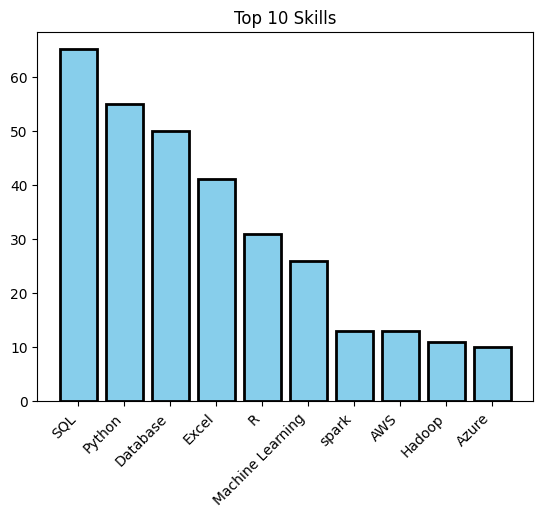

In [72]:
# Membuat plot bar chart
top_10_skills= skill_counts.head(10)
plt.bar(top_10_skills.index, top_10_skills.values,
        color='skyblue',
        edgecolor='black',
        linewidth=2)

plt.title('Top 10 Skills')
# plt.xlabel('Skills')
# plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

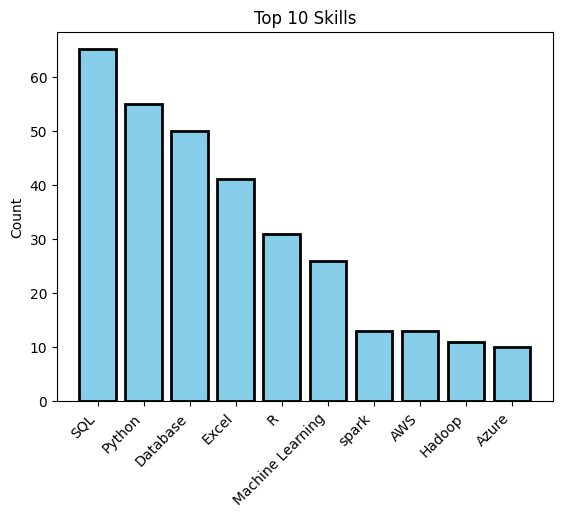

In [73]:
# Menghapus nilai 'unknown' dari perhitungan
skill_counts = skill_counts[skill_counts.index != 'Unknown']

# Membuat plot bar chart (ambil 10 teratas)
plt.bar(skill_counts.index[:10], skill_counts.values[:10], color='skyblue',
        edgecolor='black',
        linewidth=2)

plt.title('Top 10 Skills')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [56]:
# viz_tools = []

# for sub_vt in df['Visualization Tools']:
#     for vt in sub_vt:
#         viz_tools.append(vt)

In [74]:
viz_tools = [vt for sub_viz_tools in df['Visualization Tools'] for vt in sub_viz_tools]

# Menghitung frekuensi setiap keterampilan
vt_counts = pd.Series(viz_tools).value_counts()
vt_counts = vt_counts[vt_counts.index != 'Unknown']

print(viz_tools[:6])
print(vt_counts.head())

['Unknown', 'Unknown', 'power bi', 'Unknown', 'Unknown', 'Unknown']
tableau       30
power bi      25
looker         9
matplotlib     2
seaborn        1
dtype: int64


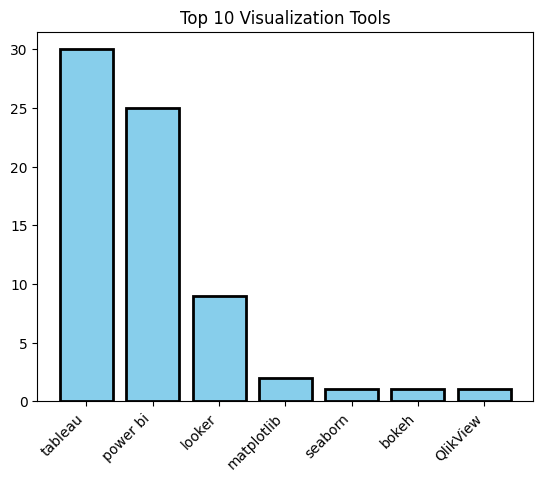

In [76]:
# Membuat plot bar chart
plt.bar(vt_counts.index[:10], vt_counts.values[:10],
        color='skyblue',
        edgecolor='black',
        linewidth=2)
plt.title('Top 10 Visualization Tools')
plt.xticks(rotation=45, ha='right')
plt.show()